# Actividad 3 - Módulo 4 : ANÁLISIS EXPLORATORIO Y PROGRAMACIÓN ESTADÍSTIC
### LIBRERÍA MATPLOTLIB
#### Autor: Nicolás Núñez

**Observación**: Se deja la variable *path* para contener la ruta de los archivos.

In [382]:
path = 'Archivos/'

### Ejercicio 1
Vamos a volver a nuestra base de datos de compras de supermercado. Para
esto cargaremos las tablas en DataFrames de la misma forma que lo hicimos
en las actividades del módulo 3. Sin embargo, esta vez usaremos Matplotlib
para graficar algunos datos de interés.

1. Lo primero que haremos es crear un gráfico circular con la distribución
porcentual de las ventas por producto.

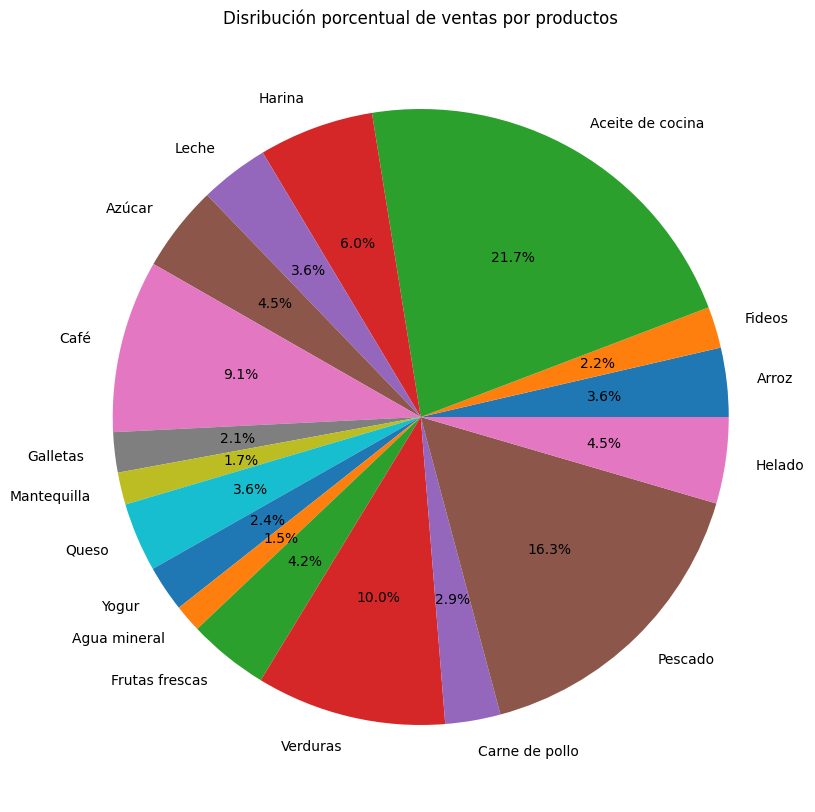

In [383]:
# Librerias requeridas
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los datos
boletas = pd.read_csv(path+'boletas.csv', encoding='latin-1').drop_duplicates()
clientes = pd.read_csv(path+'clientes.csv', encoding='latin-1').drop_duplicates()
detalle = pd.read_csv(path+'detalle.csv', encoding='latin-1').drop_duplicates()
productos = pd.read_csv(path+'productos.csv', encoding='latin-1').drop_duplicates()

# Calculamos la venta por productos
ventas = pd.merge(productos, detalle, left_on='codigo', right_on='codigo_producto', how = 'inner')
ventas.drop(['codigo_producto', 'numero_boleta'], axis=1, inplace=True)
ventas = ventas.groupby(['codigo', 'nombre']).sum()
ventas['Dist porcentual'] = round(ventas['precio']/ventas['precio'].sum()*100,2)
ventas.reset_index('nombre', inplace=True)

# Grafico circuar
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(ventas['Dist porcentual'], autopct='%1.1f%%', labels = ventas['nombre'])
ax1.set_title('Disribución porcentual de ventas por productos')
plt.show()


2. Como segundo ejercicio, crearemos un histograma para graficar las
ventas por fecha. Graficar en conjunto con puntos (marcadores) para
cada dato en un color diferente. Agregar una etiqueta al valor máximo.

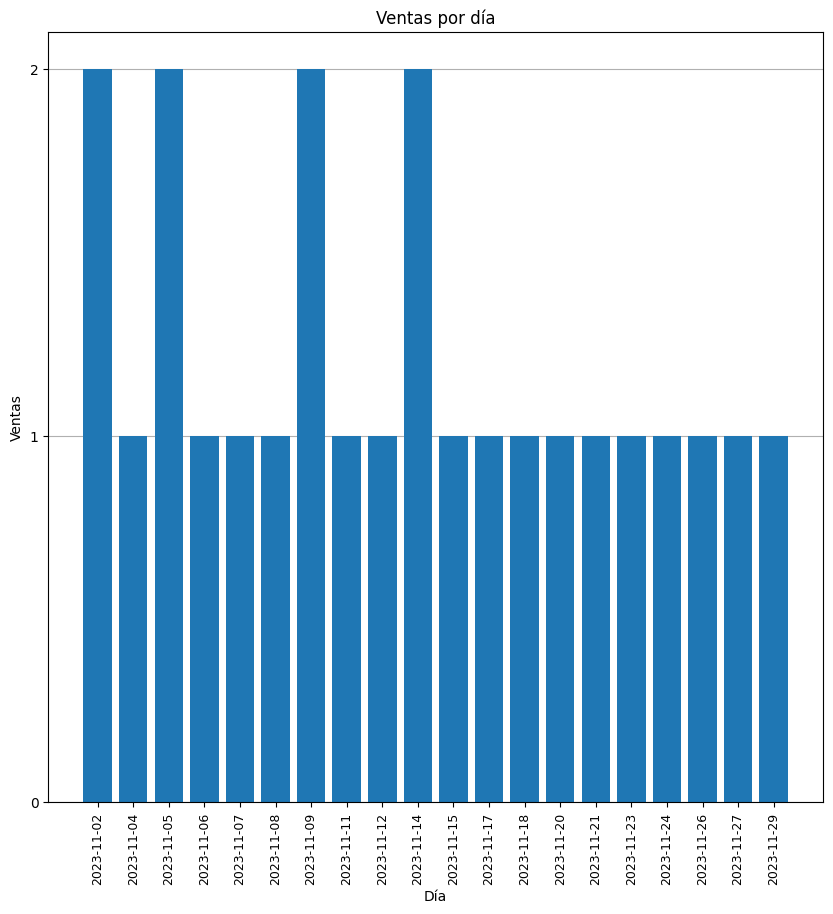

In [384]:
# Encontramos la frecuencia de datos por día
ventas_diarias = boletas.groupby(['fecha']).count().drop('rut_cliente', axis =1).reset_index()
#ventas_diarias = pd.Series(ventas_diarias['numero'], index=ventas_diarias.index)

# grafico
fig2, ax2 = plt.subplots(figsize = (10,10))
ax2.bar(list(ventas_diarias['fecha']),list(ventas_diarias['numero']))
ax2.tick_params(axis="x",labelsize=9,rotation=90)
ax2.set_xlabel('Día')
ax2.set_ylabel('Ventas')
ax2.set_yticks(range(0,3))
ax2.set_title('Ventas por día')
ax2.grid(True, axis = 'y')
ax2.set_axisbelow(True)
plt.show()


3. Ahora, crearemos un diagrama para graficar la dispersión de los
precios delos producto y encontrar los outliers de los precios de los
productos. Agregar una flecha a cada valor descubierto.

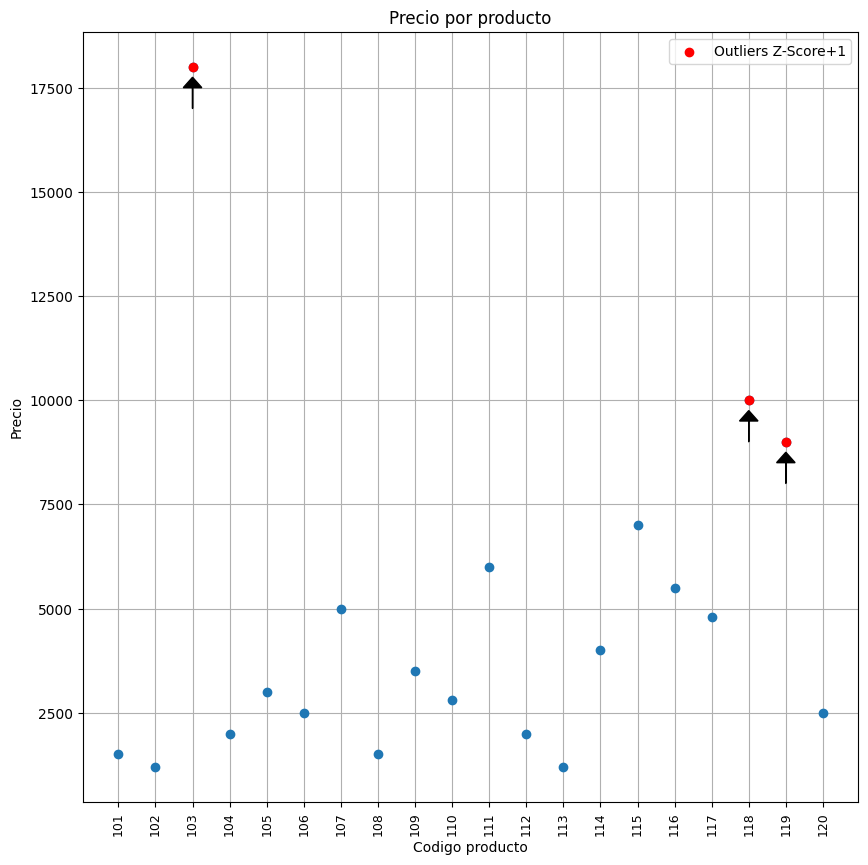

In [385]:
from scipy import stats
import numpy as np

# Encontrar outliers
z_scores = np.abs(stats.zscore(productos['precio']))
umbral = 1

outliers = np.where(z_scores > umbral)[0]

# Graficos

fig3, ax3 = plt.subplots(figsize = (10,10))
ax3.scatter(productos['codigo'], productos['precio'])
ax3.scatter(productos['codigo'][outliers], productos['precio'][outliers], color='red', label=f'Outliers Z-Score+{umbral}')
ax3.set_xticks(list(productos['codigo']))
ax3.tick_params(axis="x",labelsize=9,rotation=90)
ax3.set_xlabel('Codigo producto')
ax3.set_ylabel('Precio')
ax3.legend()
for outlier in outliers:
    ax3.arrow(productos['codigo'][outlier], productos['precio'][outlier]-1000,
               0,500, color='black', head_width=.5, head_length=250,
               label = productos['nombre'][outlier])
ax3.set_title('Precio por producto')
ax3.grid(True)
ax3.set_axisbelow(True)
plt.show()

4. Agregar, por último, un gráfico de ventas por usuario. 

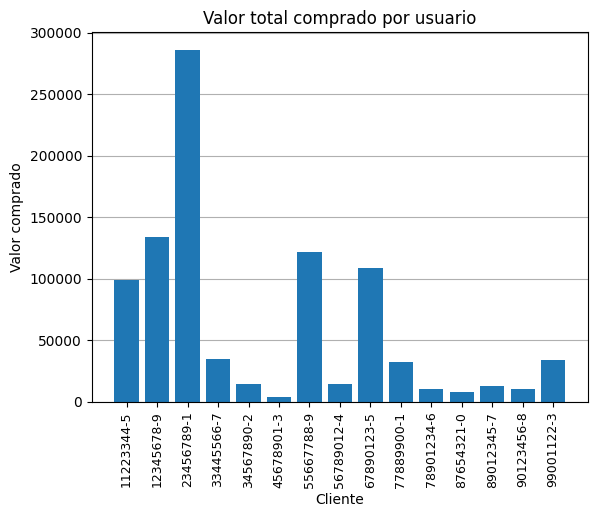

In [386]:
# Calculamos la venta por usuarios
ventas2 = (pd.merge(boletas[['numero', 'rut_cliente']],
                   detalle, left_on='numero', right_on='numero_boleta',
                     how = 'inner')).drop('numero_boleta', axis=1)
ventas2 = pd.merge(
    ventas2, productos, left_on='codigo_producto', right_on='codigo',
    how='inner'
).drop(['codigo','codigo_producto','nombre', 'numero'], axis=1)
ventas2["subtotal"] = ventas2["cantidad"]*ventas2["precio"]
ventas2.drop(['cantidad', 'precio'], axis=1, inplace=True)
ventas2 = ventas2.groupby('rut_cliente').sum()

# Grafico
fig4, ax4 = plt.subplots()
ax4.bar(ventas2.index, ventas2["subtotal"])
ax4.tick_params(axis="x",labelsize=9,rotation=90)
ax4.set_xlabel('Cliente')
ax4.set_ylabel('Valor comprado')
ax4.set_title('Valor total comprado por usuario')
ax4.grid(True, axis = 'y')
ax4.set_axisbelow(True)
plt.show()


5. Unir los cuatro gráficos en una sola imagen (subgráfico).

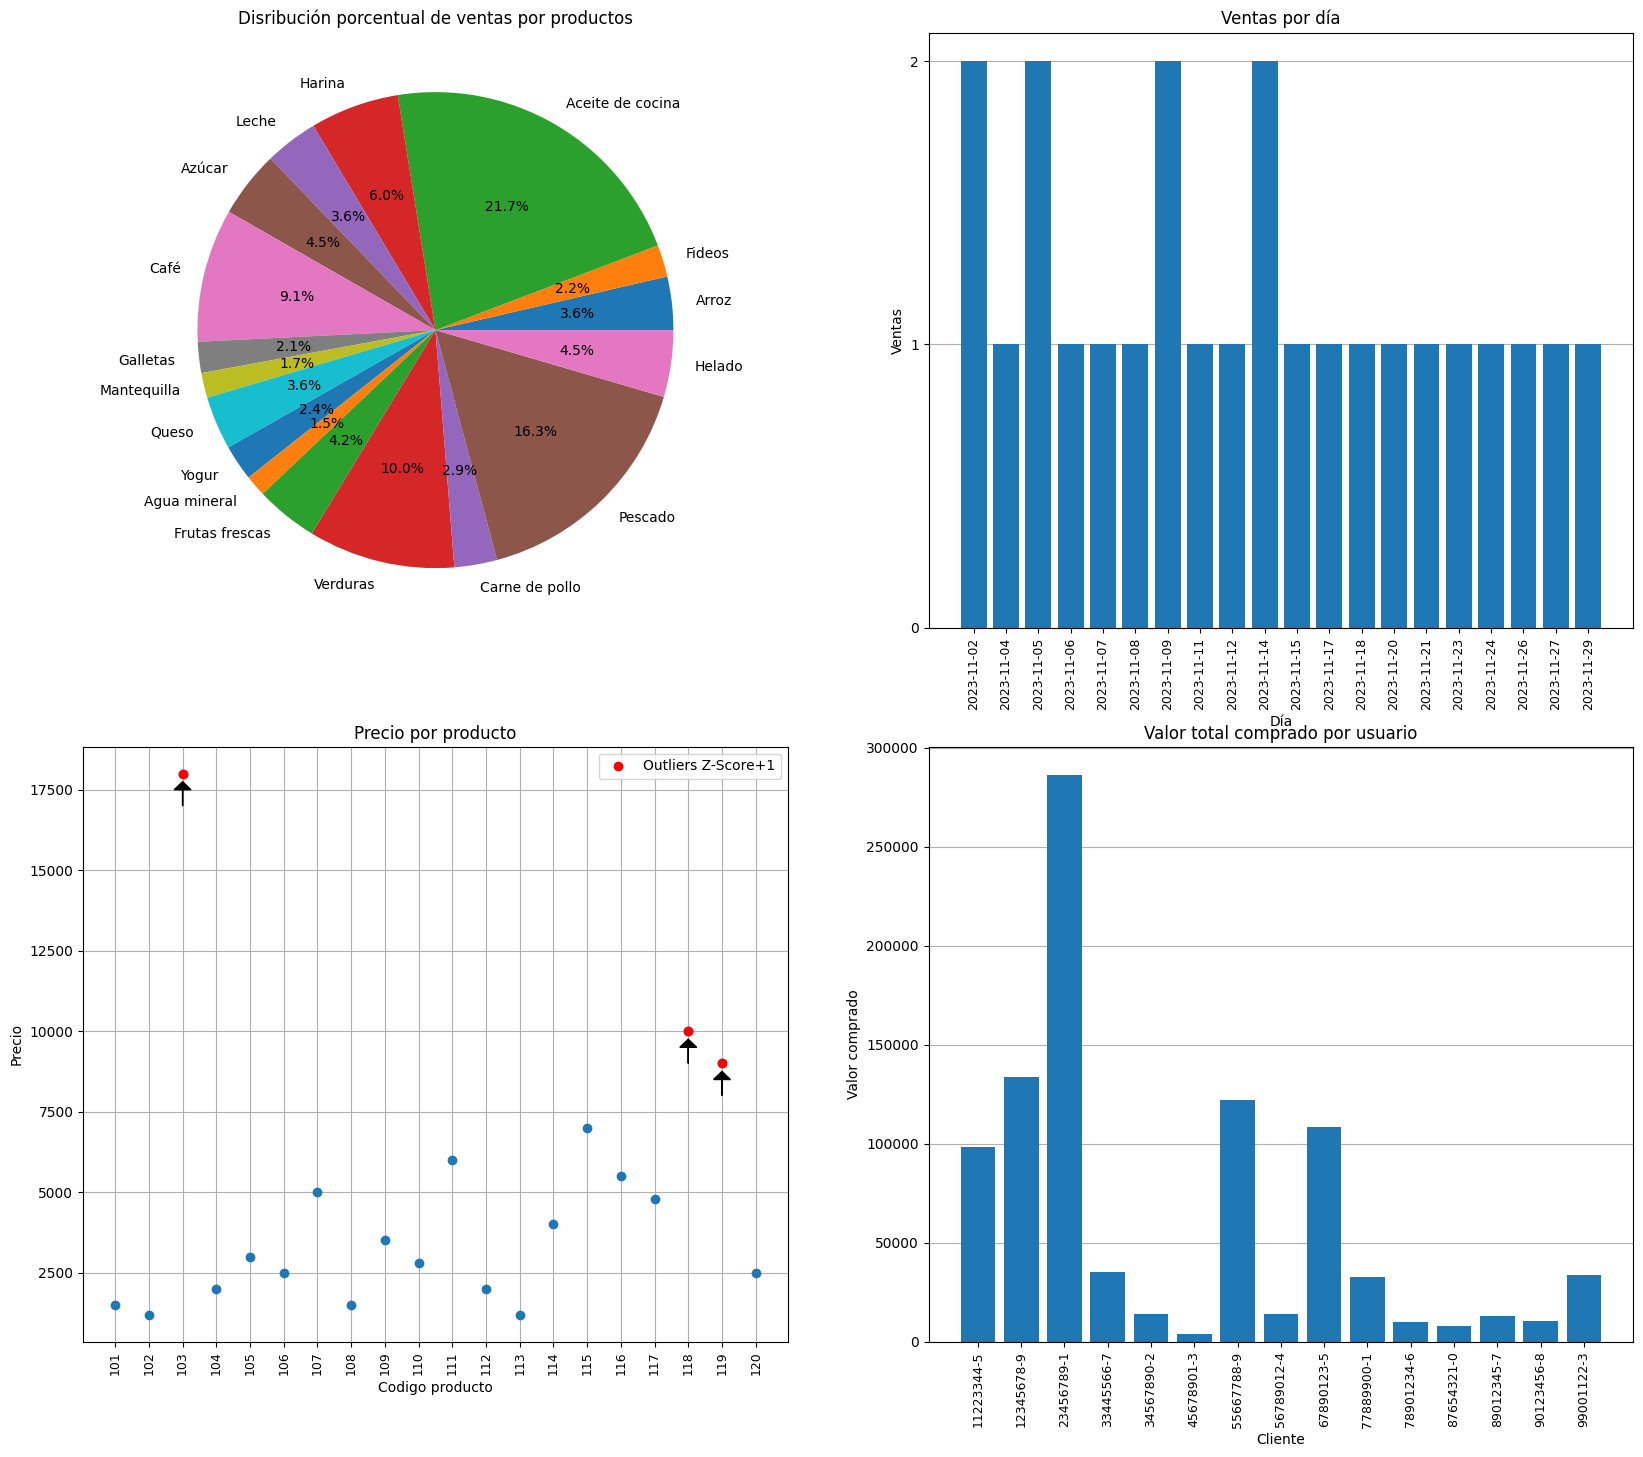

In [387]:
figs, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,17))

# Grafico 1
ax1.pie(ventas['Dist porcentual'], autopct='%1.1f%%', labels = ventas['nombre'])
ax1.set_title('Disribución porcentual de ventas por productos')
# Grafico 2
ax2.bar(list(ventas_diarias['fecha']),list(ventas_diarias['numero']))
ax2.tick_params(axis="x",labelsize=9,rotation=90)
ax2.set_xlabel('Día')
ax2.set_ylabel('Ventas')
ax2.set_yticks(range(0,3))
ax2.set_title('Ventas por día')
ax2.grid(True, axis = 'y')
ax2.set_axisbelow(True)
# Grafico 3
ax3.scatter(productos['codigo'], productos['precio'])
ax3.scatter(productos['codigo'][outliers], productos['precio'][outliers], color='red', label=f'Outliers Z-Score+{umbral}')
ax3.set_xticks(list(productos['codigo']))
ax3.tick_params(axis="x",labelsize=9,rotation=90)
ax3.set_xlabel('Codigo producto')
ax3.set_ylabel('Precio')
ax3.legend()
for outlier in outliers:
    ax3.arrow(productos['codigo'][outlier], productos['precio'][outlier]-1000,
               0,500, color='black', head_width=.5, head_length=250,
               label = productos['nombre'][outlier])
ax3.set_title('Precio por producto')
ax3.grid(True)
ax3.set_axisbelow(True)
# Grafico 4
ax4.bar(ventas2.index, ventas2["subtotal"])
ax4.tick_params(axis="x",labelsize=9,rotation=90)
ax4.set_xlabel('Cliente')
ax4.set_ylabel('Valor comprado')
ax4.set_title('Valor total comprado por usuario')
ax4.grid(True, axis = 'y')
ax4.set_axisbelow(True)

### Ejericio 2
Se tiene un fichero “**M4E3 - Casas Boston**” con información relativa a datos
de un estudio realizado en la zona de Boston, donde se analizan diferentes
variables, como son el índice de crimen, el número de habitaciones, el
porcentaje de habitantes de clase baja y el valor medio de las casas de esa
zona.

Pasos a seguir:

1. Importar librerías a utilizar para el caso en cuestión (panda, matplotlib).

In [388]:
# Librerias requeridas
import pandas as pd
import matplotlib.pyplot as plt

2. Leer csv correspondiente.

In [398]:
# Cargado de datos
datos = pd.read_csv(path+'Casas Boston.csv', encoding='latin-1').drop_duplicates()
display(datos)

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


3. Renombrar campos.

In [399]:
## Es posible renombrar los campos utilizados en el siguiente item como
#datos.rename(columns={
#    'TOWN': 'Ciudad',
#    'MEDV': 'Valor medio',
#    'CRIM': 'Indice crimen',
#    'RM': 'Media habitaciones'
#    }, inplace = True)
## Pero por comodidad se dejaran los campos originales.

4. Confeccionar los siguientes gráficos:

**Histograma**: Un histograma es útil para ver la distribución de una
variable, es decir, nos permite ver los valores más comunes. Para el
caso que se presenta se desea ver la distribución de la cantidad media
de habitaciones en el estudio realizado.


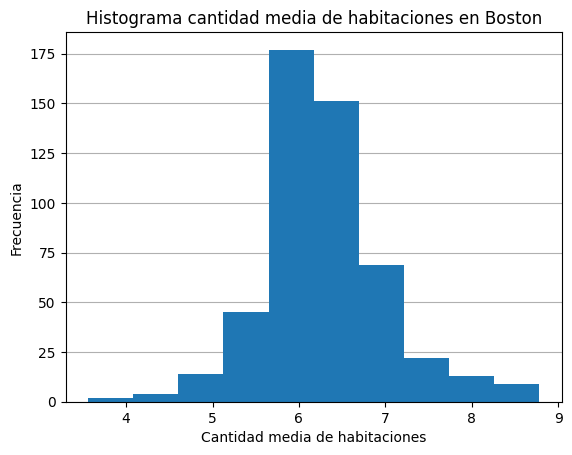

In [391]:
fig1, ax1 = plt.subplots()
ax1.hist(list(datos['RM']))
ax1.set_xlabel('Cantidad media de habitaciones')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Histograma cantidad media de habitaciones en Boston')
ax1.grid(True, axis = 'y')
ax1.set_axisbelow(1)
plt.show()

**Dispersión**: sirve para representar la relación entre dos variables. Para
nuestro caso se desea ver la relación entre índice de crimen y el valor
mediano de las casas. En otras palabras, ¿el índice de crimen afecta el
valor medio de las casas?

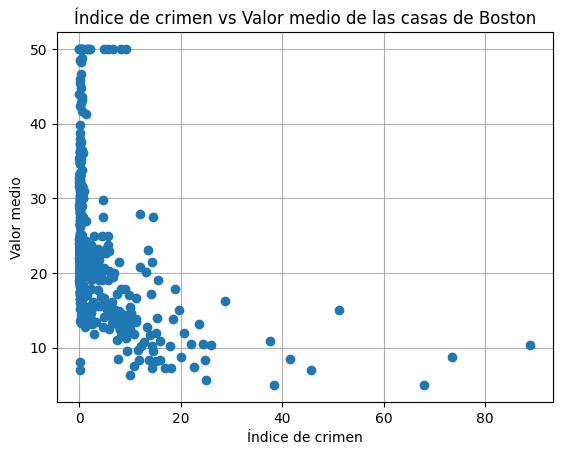

In [392]:
fig2, ax2 = plt.subplots()
ax2.scatter(datos['CRIM'], datos['MEDV'])
ax2.set_xlabel('Índice de crimen')
ax2.set_ylabel('Valor medio')
ax2.set_title('Índice de crimen vs Valor medio de las casas de Boston')
ax2.grid(True)
ax2.set_axisbelow(1)
plt.show()

A partir del gráfico se puede inferir una relación inversamente proporcional, pero no lineal necesariamente.

**Barras**: Un gráfico de barras es útil para comparar una variable entre
distintos grupos o categorías. Por ejemplo, si quisiéramos observar el
valor medio de cada ciudad. Para nuestro caso se desea agrupar por
ciudad y toma la media del valor mediano. Grafica las 10 primeras
ciudades.

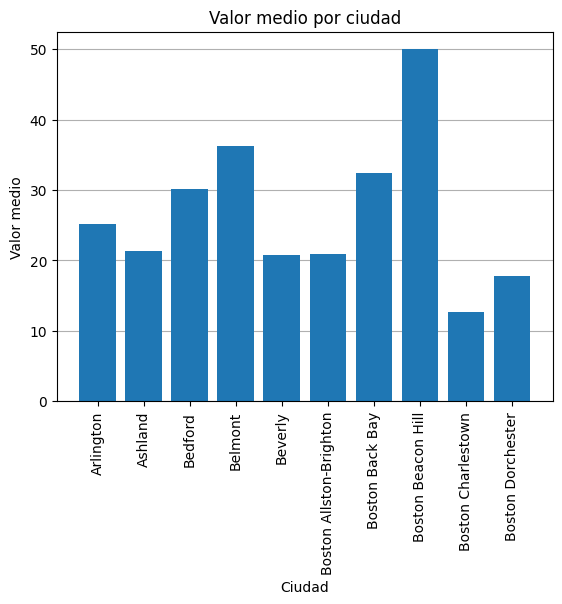

In [393]:
grupo = (datos[['TOWN', 'MEDV']].groupby('TOWN').mean()).reset_index()[0:10]

# Grafico de barras
fig3, ax3 = plt.subplots()
ax3.bar(grupo['TOWN'], grupo['MEDV'])
ax3.set_xlabel('Ciudad')
ax3.set_ylabel('Valor medio')
ax3.set_title('Valor medio por ciudad')
ax3.tick_params(axis="x",rotation=90, labelsize=10)
ax3.grid(True, axis = 'y')
ax3.set_axisbelow(1)
plt.show()

**Cajas**: Los diagramas de cajas son útiles para representar grupos de
datos y compararlos entre ellos. Otro uso importante es que nos
permiten identificar de forma sencilla si una variable tiene muchos
outliers (valores atípicos) esto es, elementos que se alejan de los
valores frecuentes de dicha variable. Para nuestro caso, se desea ver
los valores atípicos de índice de crimen en los diferentes cuantiles de
valor mediano

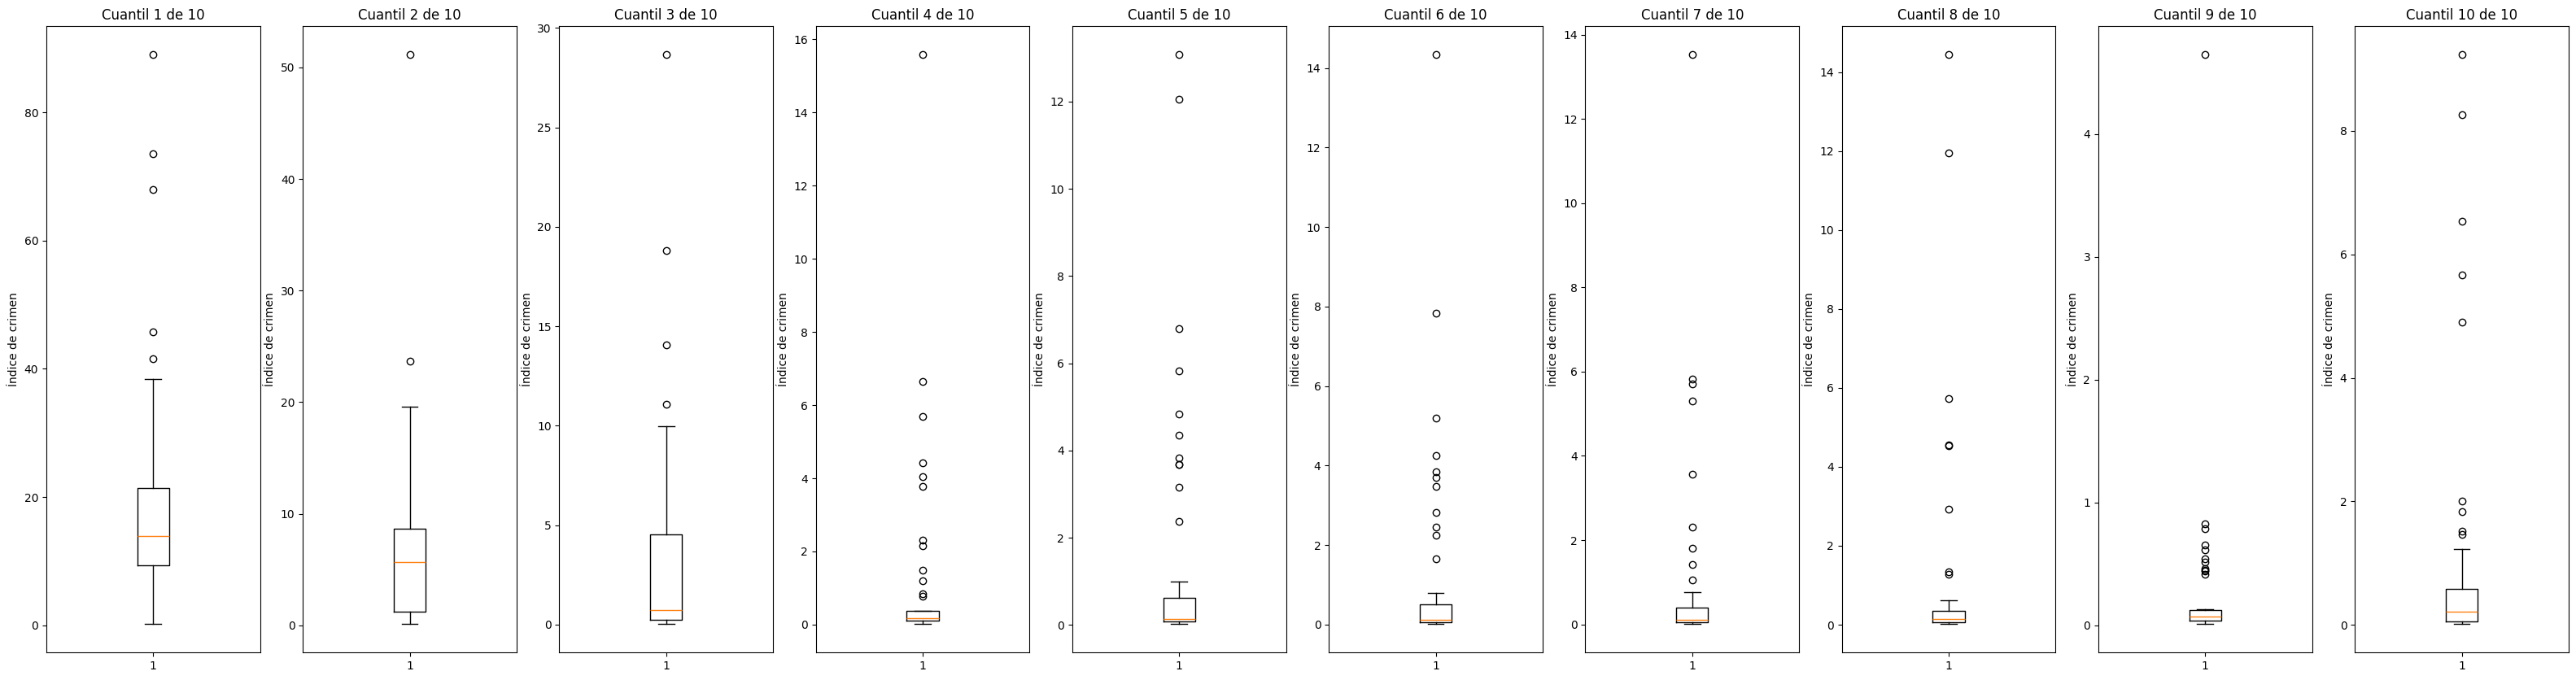

In [422]:
n = 10
grupo2 = datos[['CRIM','MEDV']]
#grupo2['Cuantil'] = pd.qcut(grupo2['MEDV'], n, labels = [i for i in range(1, n+1)])
cuantil = pd.qcut(grupo2['MEDV'], n, labels = [i for i in range(1, n+1)])

data = []
for i in range(1,n+1):
    data.append(list(grupo2[cuantil==i]['CRIM']))

# Grafico
fig, axs = plt.subplots(1,n, figsize=(n*4,10))
for i in range(0,n):
    axs[i].boxplot(data[i])
    axs[i].set_ylabel('Índice de crimen')
    axs[i].set_title('Cuantil '+str(i+1)+' de '+str(n))